In [1]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)

import keras
print("Keras Version:", keras.__version__)


TensorFlow Version: 2.15.0
Keras Version: 2.15.0


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load your trained model
model = tf.keras.models.load_model('C:/Users/anilk/Downloads/InceptionV3')

# Updated class map dictionary with both file name and display name
class_map = {
    0: ['burger','Burger'], 1: ['butter_naan','Butter Naan'], 2: ['chai','Chai'],
    3: ['chapati','Chapati'], 4: ['chole_bhature','Chole Bhature'], 5: ['dal_makhani','Dal Makhani'],
    6: ['dhokla','Dhokla'], 7: ['fried_rice','Fried Rice'], 8: ['idli','Idli'], 9: ['jalegi','Jalebi'],
    10: ['kathi_rolls','Kaathi Rolls'], 11: ['kadai_paneer','Kadai Paneer'], 12: ['kulfi','Kulfi'],
    13: ['masala_dosa','Masala Dosa'], 14: ['momos','Momos'], 15: ['paani_puri','Paani Puri'],
    16: ['pakode','Pakode'], 17: ['pav_bhaji','Pav Bhaji'], 18: ['pizza','Pizza'], 19: ['samosa','Samosa']
}

# Function to preprocess an image
def preprocess_image(img_path, target_size=(299, 299)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array

# Predict and plot probabilities
def predict_and_plot(img_path):
    img, img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)[0]  # Get softmax probabilities

    # Sort classes by probability in descending order
    sorted_indices = np.argsort(predictions)[::-1]
    sorted_probs = predictions[sorted_indices]
    
    # Use the display name (index 1) from the class_map for visualization
    sorted_classes = [class_map[i][1] for i in sorted_indices]
    sorted_file_classes = [class_map[i][0] for i in sorted_indices]

    # Threshold checks - now storing both class and probability
    high_prob_classes = [(cls, prob) for cls, prob in zip(sorted_classes, sorted_probs) if prob >= 0.60]
    moderate_prob_classes = [(cls, prob) for cls, prob in zip(sorted_classes, sorted_probs) if 0.20 <= prob < 0.60]

    # Initialize result list
    res = []

    # Display probabilities in text format
    print("\nPredicted Class Probabilities (Sorted):\n")
    for cls, prob in zip(sorted_classes, sorted_probs):
        print(f"{cls}: {prob:.4f}")

    # Decision logic and populate res list
    if len(high_prob_classes) == 1:
        best_prediction = high_prob_classes[0][0]
        best_file_class = sorted_file_classes[sorted_classes.index(best_prediction)]
        print(f"\n🟢 Predicted Class: {best_prediction} (file class: {best_file_class})")
        title = f"Predicted: {best_prediction}"
        res = [best_prediction]
    elif len(moderate_prob_classes) > 1:
        print("\n🟡 Multiple classes have significant probability → Grouped food detected!")
        title = "Grouped food"
        # Get top 2 moderate probability classes for the result
        res = [cls for cls, prob in moderate_prob_classes[:2]]
    else:
        print("\n🔴 No class crosses the threshold → Out of class image!")
        title = "Out of class image"
        res = []

    # Plot the image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(title, fontsize=14, fontweight="bold")

    # Plot probability bar chart
    plt.subplot(1, 2, 2)
    bars = plt.barh(sorted_classes[::-1], sorted_probs[::-1], color="skyblue")  # Reverse for highest at top
    
    # Color code the bars based on results
    if len(res) == 1:
        # Single prediction - highlight in green
        idx = sorted_classes[::-1].index(res[0])
        bars[idx].set_color('green')
    elif len(res) > 1:
        # Grouped food - highlight in orange
        for food in res:
            idx = sorted_classes[::-1].index(food)
            bars[idx].set_color('orange')
    
    plt.xlabel("Probability")
    plt.ylabel("Food Classes")
    plt.title("Class Probabilities (Sorted)")

    plt.tight_layout()
    plt.show()
    
    return res  # Return the result list


1/1 [==============================] - 3s 3s/step

Predicted Class Probabilities (Sorted):

Momos: 0.8872
Samosa: 0.0304
Chole Bhature: 0.0239
Pakode: 0.0163
Paani Puri: 0.0160
Dal Makhani: 0.0043
Idli: 0.0041
Pav Bhaji: 0.0024
Kaathi Rolls: 0.0020
Burger: 0.0017
Jalebi: 0.0016
Butter Naan: 0.0014
Fried Rice: 0.0014
Masala Dosa: 0.0014
Kadai Paneer: 0.0013
Chai: 0.0013
Kulfi: 0.0012
Chapati: 0.0011
Dhokla: 0.0007
Pizza: 0.0002

🟢 Predicted Class: Momos (file class: momos)


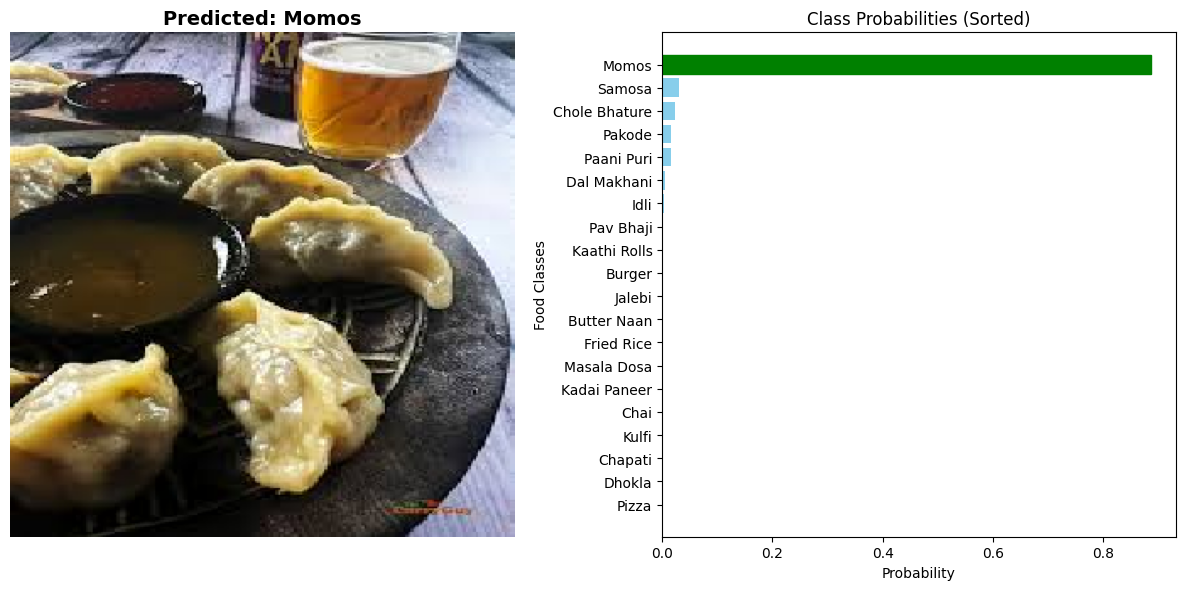

In [3]:
result1=predict_and_plot("C:/Users/anilk/Downloads/momos_img.jpeg")

1/1 [==============================] - 0s 145ms/step

Predicted Class Probabilities (Sorted):

Fried Rice: 0.9922
Dal Makhani: 0.0023
Pav Bhaji: 0.0010
Chapati: 0.0009
Kadai Paneer: 0.0008
Chole Bhature: 0.0004
Pizza: 0.0004
Butter Naan: 0.0003
Pakode: 0.0003
Jalebi: 0.0002
Momos: 0.0002
Paani Puri: 0.0002
Dhokla: 0.0002
Kulfi: 0.0002
Idli: 0.0002
Burger: 0.0001
Masala Dosa: 0.0001
Chai: 0.0001
Samosa: 0.0001
Kaathi Rolls: 0.0000

🟢 Predicted Class: Fried Rice (file class: fried_rice)


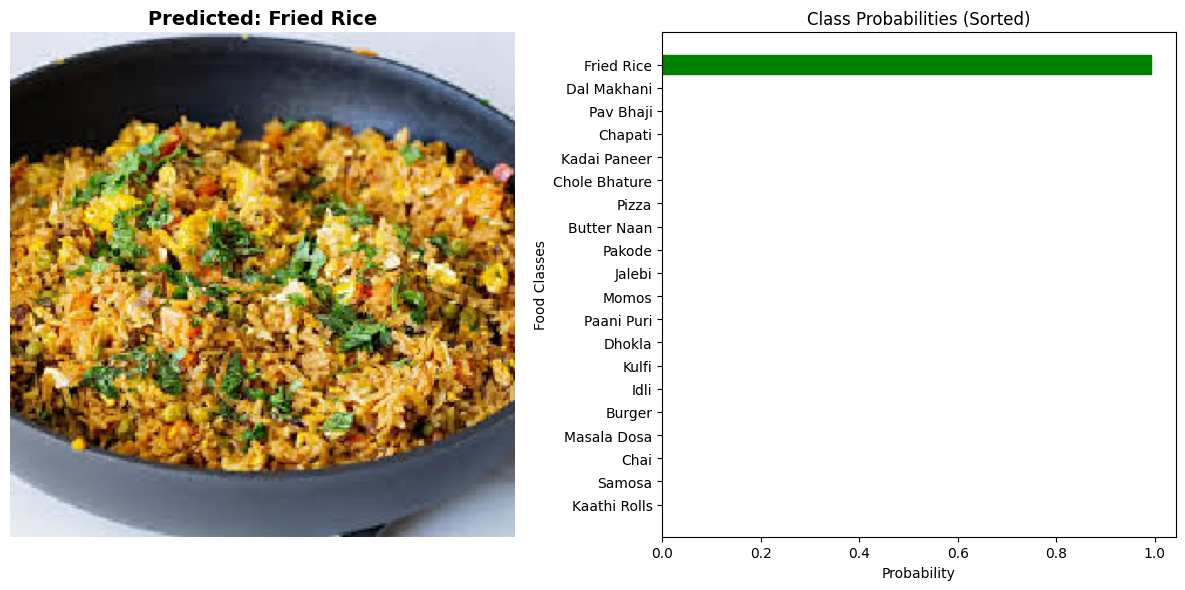

In [83]:
result2=predict_and_plot("C:/Users/anilk/Downloads/friedrice_img.jpeg")

1/1 [==============================] - 0s 155ms/step

Predicted Class Probabilities (Sorted):

Kaathi Rolls: 0.4684
Butter Naan: 0.3439
Chapati: 0.0628
Pav Bhaji: 0.0247
Momos: 0.0186
Kadai Paneer: 0.0130
Pakode: 0.0124
Chole Bhature: 0.0098
Samosa: 0.0069
Idli: 0.0068
Kulfi: 0.0065
Dal Makhani: 0.0060
Masala Dosa: 0.0054
Fried Rice: 0.0043
Pizza: 0.0041
Paani Puri: 0.0027
Dhokla: 0.0021
Burger: 0.0006
Chai: 0.0005
Jalebi: 0.0005

🟡 Multiple classes have significant probability → Grouped food detected!


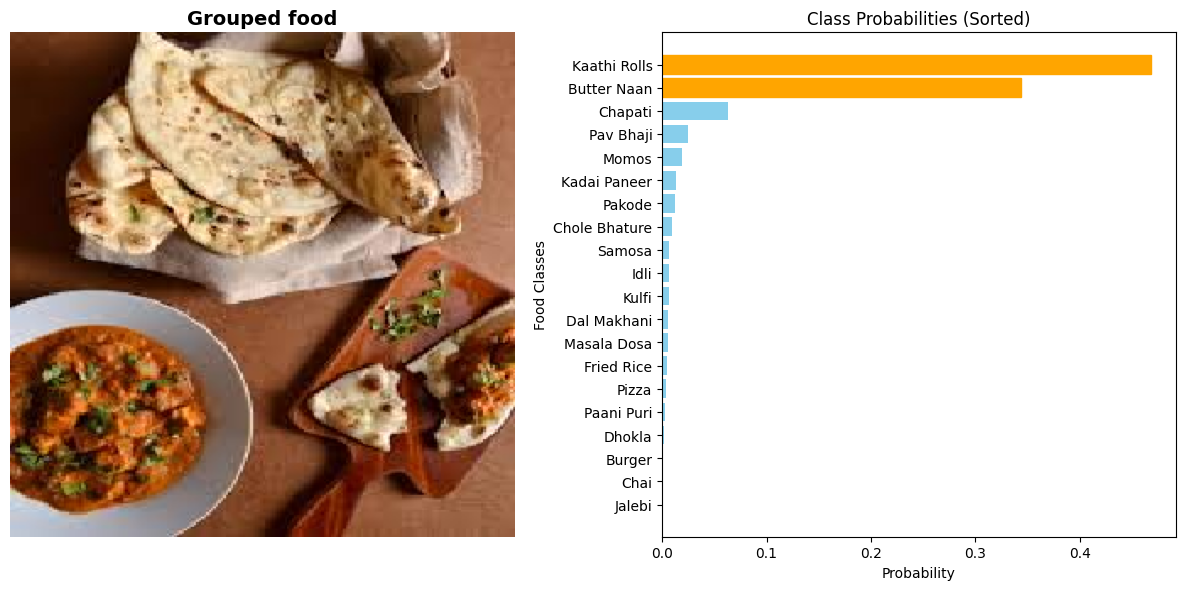

In [84]:
result3=predict_and_plot("C:/Users/anilk/Downloads/grouped1_img.jpeg")

1/1 [==============================] - 0s 136ms/step

Predicted Class Probabilities (Sorted):

Paani Puri: 0.2711
Pav Bhaji: 0.1041
Pakode: 0.0767
Momos: 0.0701
Masala Dosa: 0.0514
Idli: 0.0474
Chole Bhature: 0.0460
Samosa: 0.0438
Burger: 0.0314
Kadai Paneer: 0.0313
Jalebi: 0.0272
Chai: 0.0271
Pizza: 0.0265
Kulfi: 0.0258
Butter Naan: 0.0252
Kaathi Rolls: 0.0249
Dal Makhani: 0.0248
Dhokla: 0.0183
Chapati: 0.0166
Fried Rice: 0.0103

🔴 No class crosses the threshold → Out of class image!


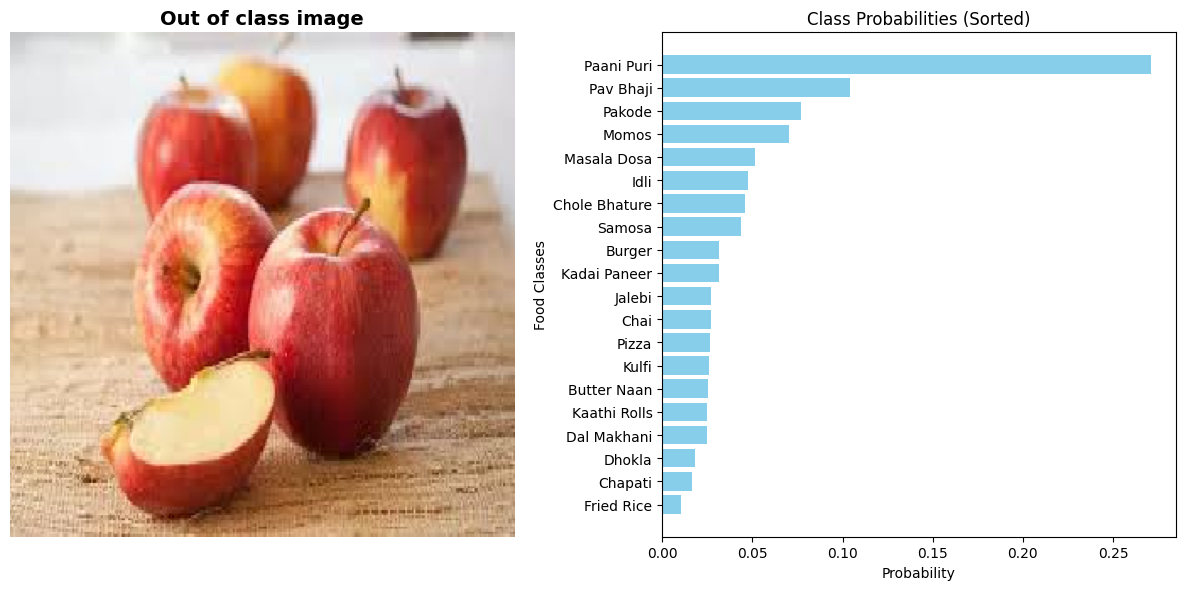

In [86]:
result4=predict_and_plot("C:/Users/anilk/Downloads/apple_img.jpeg")

In [6]:
def get_final_identification(res):
    # Handle empty prediction case
    if not res:
        print("\nThe model couldn't identify the food.")
        user_input = input(">> What food did you eat? (comma-separated) ").strip()
        if not user_input:
            return ""
        
        # Split and clean food items
        res = [food.strip() for food in user_input.split(",") if food.strip()]
    
    # Get weight for each food
    weight_list = []
    for food in res:
        weight_input = input(f">> How many grams of '{food}' did you eat? ").strip()
        weight_list.append(weight_input)

    # Create the result string in desired format
    result_parts = []
    for food, weight in zip(res, weight_list):
        result_parts.append(f"{food} {weight}gms")
    
    return ", ".join(result_parts)

In [30]:
from groq import Groq

client = Groq(api_key="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")

def get_final_identification(res):
    """Get structured food report by asking AI-generated clarification questions one by one"""
    if not res:
        print("\nThe model couldn't identify the food.")
        user_input = input(">> What food did you eat? (comma-separated): ").strip()
        if not user_input:
            return []
        res = [food.strip() for food in user_input.split(",") if food.strip()]
    
    food_reports = []

    for food in res:
        weight = input(f">> How many grams of '{food}' did you eat? ").strip()
        
        # Prompt to generate food-specific clarifying questions
        prompt = f"""
        Generate 2-3 short, user-friendly questions to help describe the food item: '{food}'.
        The questions should ask about preparation method, spice level, oil content, type, or ingredients.
        
        Return ONLY a valid JSON array (list) of strings.
        
        Example Output:
        ["Was it fried, boiled, or raw?", "Was it spicy or mild?", "What ingredients did it include?"]
        """

        response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You generate helpful questions to describe food intake."},
                {"role": "user", "content": prompt}
            ],
            model="llama3-70b-8192"
        )

        try:
            # Safely parse the model output using json.loads
            import json
            question_list = json.loads(response.choices[0].message.content)
        except Exception as e:
            print(f"Error parsing questions: {e}")
            question_list = ["Describe how the food was prepared."]

        # Ask each question one by one
        print(f"\n>> Let's describe '{food}':")
        answers = []
        for i, question in enumerate(question_list, 1):
            answer = input(f"Q{i}: {question.strip()} ").strip()
            answers.append(answer)

        # Build report
        food_reports.append({
            "food": food,
            "weight_gms": weight,
            "description_details": "; ".join(answers)
        })

    return food_reports


In [21]:
import os
import json
from groq import Groq

# Initialize Groq client
client = Groq(api_key="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")  # Replace with your actual API key

def get_calorie_analysis(food_report, calorie_goal):
    """Process food report through LLM to get calorie analysis"""
    prompt = f"""
    Analyze this food consumption report and calculate total calories consumed.
    Then calculate remaining calories based on the daily goal.
    
    Food Report:
    {food_report}
    
    Daily Calorie Goal: {calorie_goal} calories
    
    Return ONLY a JSON object with:
    - total_calories (sum of all food items)
    - calories_remaining (goal - consumed)
    - message (brief analysis)
    
    Example Output:
    {{
        "total_calories": 1200,
        "calories_remaining": 800,
        "message": "You've consumed 1200 calories today (60% of goal). 800 calories remaining."
    }}
    """
    
    response = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "You are a nutrition assistant. Calculate calories and return only JSON."},
            {"role": "user", "content": prompt}
        ],
        model="llama3-70b-8192",
        response_format={"type": "json_object"}
    )
    
    return json.loads(response.choices[0].message.content)

def get_food_recommendations(calories_remaining, preferences=""):
    """Get personalized food recommendations based on remaining calories and preferences"""
    prompt = f"""
    Suggest 3-5 appropriate food options that would fit within {calories_remaining} remaining calories.
    Consider these preferences: {preferences if preferences else 'no specific preferences'}

    For each food, include:
    - Food name
    - Estimated calories
    - Suggested amount to eat (in grams or standard units) that corresponds to that calorie value.

    Return ONLY a JSON object with:
    - recommendations (list of strings in the format: "Food name (~X calories) → Y grams/units")
    - estimated_calories (list of calorie estimates as integers)
    - message (brief explanation)

    Example Output:
    {{
        "recommendations": [
            "Greek yogurt with berries (~200 calories) → 150g",
            "Grilled chicken salad (~350 calories) → 250g",
            "Vegetable stir-fry (~300 calories) → 300g"
        ],
        "estimated_calories": [200, 350, 300],
        "message": "These options fit your remaining calories and preferences."
    }}
    """
    
    response = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "You are a nutritionist suggesting healthy food options."},
            {"role": "user", "content": prompt}
        ],
        model="llama3-70b-8192",
        response_format={"type": "json_object"}
    )
    
    return json.loads(response.choices[0].message.content)

def main(report):
    # Get user inputs
    calorie_goal = int(input("Enter your daily calorie goal: "))
    food_report = report
    # Display results
    print("\n=== CALORIE ANALYSIS ===")
    print("Food intake report:", food_report)
    
    # Get calorie analysis
    analysis = get_calorie_analysis(food_report, calorie_goal)
    

    print(f"Total consumed: {analysis['total_calories']} calories")
    print(f"Remaining: {analysis['calories_remaining']} calories")
    print("_______________________________________________________________")
    print(f"Message: {analysis['message']}")
    
    # Recommendation option
    recommend = input("\nWould you like food recommendations? (y/n): ").lower()
    if recommend == 'y':
        preferences = input("Enter your food preferences (e.g., vegetarian, low-carb, etc.) or press enter: ")
        
        # Get recommendations
        recommendations = get_food_recommendations(analysis['calories_remaining'], preferences)
        
        # Display recommendations
        print("\n=== FOOD RECOMMENDATIONS ===")
        for food, cals in zip(recommendations['recommendations'], recommendations['estimated_calories']):
            print(f"- {food} (~{cals} calories)")
        print(f"\n{recommendations['message']}")
    
    print("\nHave a healthy day!")

In [ ]:
#  ========================================================= TEST FOR NEW =========================================================

1/1 [==============================] - 0s 246ms/step

Predicted Class Probabilities (Sorted):

Paani Puri: 0.2711
Pav Bhaji: 0.1041
Pakode: 0.0767
Momos: 0.0701
Masala Dosa: 0.0514
Idli: 0.0474
Chole Bhature: 0.0460
Samosa: 0.0438
Burger: 0.0314
Kadai Paneer: 0.0313
Jalebi: 0.0272
Chai: 0.0271
Pizza: 0.0265
Kulfi: 0.0258
Butter Naan: 0.0252
Kaathi Rolls: 0.0249
Dal Makhani: 0.0248
Dhokla: 0.0183
Chapati: 0.0166
Fried Rice: 0.0103

🔴 No class crosses the threshold → Out of class image!


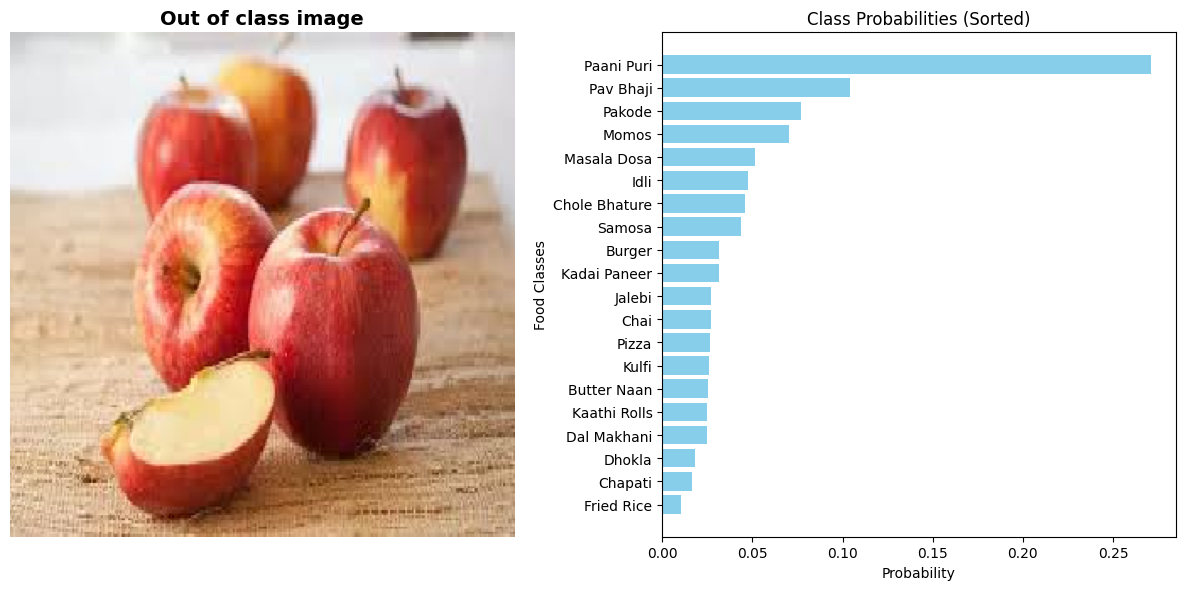

In [33]:
result4=predict_and_plot("C:/Users/anilk/Downloads/apple_img.jpeg")

In [34]:
report = get_final_identification(result4)

if report:
    print("\nFood consumption report:")
    print(report)
else:
    print("\nNo food was recorded")


The model couldn't identify the food.


>> What food did you eat? (comma-separated):  apple
>> How many grams of 'apple' did you eat?  300



>> Let's describe 'apple':


Q1: Was the apple eaten raw or cooked?  raw
Q2: Did the apple have any added spices or sweeteners?  no i ate as ripe
Q3: Was the apple a specific variety, such as Granny Smith or Red Delicious?  kashmir apples



Food consumption report:
[{'food': 'apple', 'weight_gms': '300', 'description_details': 'raw; no i ate as ripe; kashmir apples'}]


In [35]:
main(report)

Enter your daily calorie goal:  2000



=== CALORIE ANALYSIS ===
Food intake report: [{'food': 'apple', 'weight_gms': '300', 'description_details': 'raw; no i ate as ripe; kashmir apples'}]
Total consumed: 95 calories
Remaining: 1905 calories
_______________________________________________________________
Message: You've consumed 95 calories today (4.75% of goal). 1905 calories remaining.



Would you like food recommendations? (y/n):  y
Enter your food preferences (e.g., vegetarian, low-carb, etc.) or press enter:  non vegetarian chicken spice low carb



=== FOOD RECOMMENDATIONS ===
- Spicy Chicken Breast (~340 calories) → 120g (~340 calories)
- Cauliflower Rice with Chicken (~240 calories) → 1 cup (~240 calories)
- Chicken Fajita with Bell Peppers (~425 calories) → 250g (~425 calories)

These options fit your remaining calories and preferences, with a balance of protein, healthy fats, and low-carb vegetables.

Have a healthy day!


1/1 [==============================] - 0s 154ms/step

Predicted Class Probabilities (Sorted):

Fried Rice: 0.9922
Dal Makhani: 0.0023
Pav Bhaji: 0.0010
Chapati: 0.0009
Kadai Paneer: 0.0008
Chole Bhature: 0.0004
Pizza: 0.0004
Butter Naan: 0.0003
Pakode: 0.0003
Jalebi: 0.0002
Momos: 0.0002
Paani Puri: 0.0002
Dhokla: 0.0002
Kulfi: 0.0002
Idli: 0.0002
Burger: 0.0001
Masala Dosa: 0.0001
Chai: 0.0001
Samosa: 0.0001
Kaathi Rolls: 0.0000

🟢 Predicted Class: Fried Rice (file class: fried_rice)


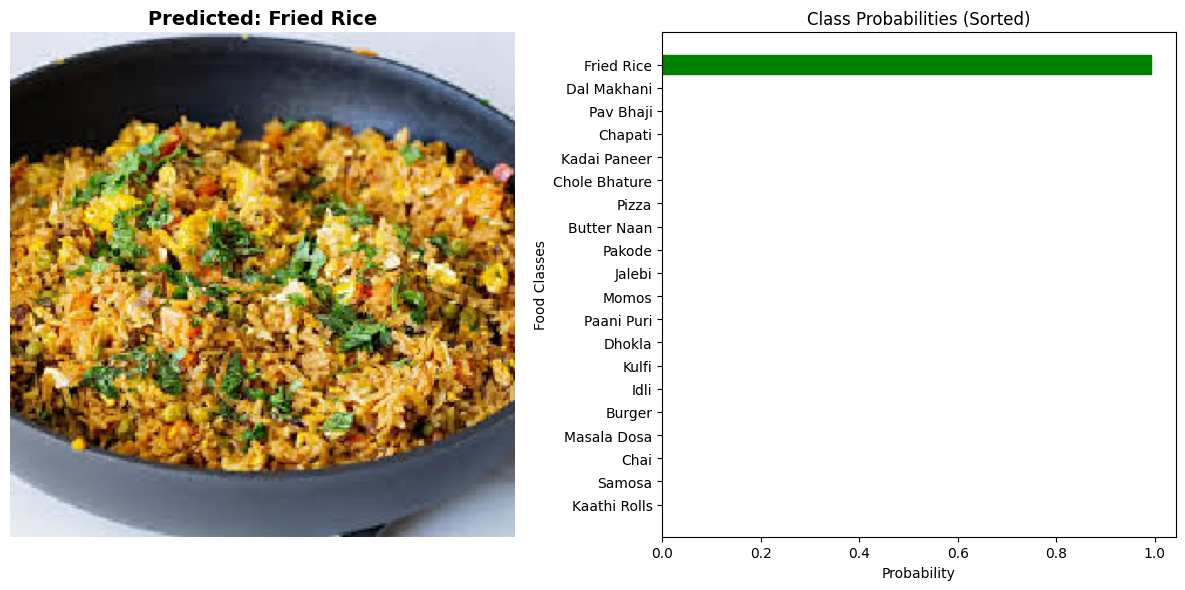

In [10]:
result2=predict_and_plot("C:/Users/anilk/Downloads/friedrice_img.jpeg")

In [36]:
report2 = get_final_identification(result2)

if report2:
    print("\nFood consumption report:")
    print(report2)
else:
    print("\nNo food was recorded")

>> How many grams of 'Fried Rice' did you eat?  400



>> Let's describe 'Fried Rice':


Q1: What type of rice was used (white, brown, jasmine)?  basmati
Q2: Was it mildly seasoned or heavily spiced?  heavily spiced
Q3: Were there any notable ingredients, such as vegetables, meat, or eggs?  chicken and egg are included, and some greenies too



Food consumption report:
[{'food': 'Fried Rice', 'weight_gms': '400', 'description_details': 'basmati; heavily spiced; chicken and egg are included, and some greenies too'}]


In [37]:
main(report2)

Enter your daily calorie goal:  1000



=== CALORIE ANALYSIS ===
Food intake report: [{'food': 'Fried Rice', 'weight_gms': '400', 'description_details': 'basmati; heavily spiced; chicken and egg are included, and some greenies too'}]
Total consumed: 550 calories
Remaining: 450 calories
_______________________________________________________________
Message: You've consumed 550 calories today (55% of goal). 450 calories remaining.



Would you like food recommendations? (y/n):  y
Enter your food preferences (e.g., vegetarian, low-carb, etc.) or press enter:  fish , include rice, less spicy, no green veges



=== FOOD RECOMMENDATIONS ===
- Baked cod with rice (~220 calories) → 120g fish, 100g rice (~220 calories)
- Tuna sushi rolls (~180 calories) → 6 pieces (~180 calories)
- Grilled tilapia with quinoa and pineapple (~150 calories) → 100g fish, 50g quinoa, 50g pineapple (~150 calories)

These seafood options fit your remaining calories and preferences, incorporating fish and rice as requested.

Have a healthy day!
